## Understanding relationship between columns

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [31]:
data_path = '../../data/preprocessed/preprocessed_data_20250720_131842/'
file_pattern = 'X_*_scaled.csv'

In [32]:
csv_files = glob.glob(data_path+file_pattern)

print(csv_files)

# Read and concatenate all files
dataframes = []
for file in csv_files:
    df_temp = pd.read_csv(file)
    dataframes.append(df_temp)

# Combine all dataframes
combined_df = pd.concat(dataframes, ignore_index=True)
print(f"Combined shape: {combined_df.shape}")

display(combined_df.head())

['../../data/preprocessed/preprocessed_data_20250720_131842/X_test_scaled.csv', '../../data/preprocessed/preprocessed_data_20250720_131842/X_train_scaled.csv']
Combined shape: (2111, 21)


Height    Weight  family_history_with_overweight  FAVC      FCVC  \
0  3.383933  1.348498                               0     1  5.000000   
1  3.625046  1.690566                               0     1  3.000000   
2  2.861183  2.373286                               1     1  3.000000   
3  3.724066  4.279550                               1     1  5.000000   
4  2.833776  3.112814                               1     1  4.359328   

        NCP      CAEC  SMOKE      CH2O  SCC  ...       TUE      CALC  \
0  4.634396  2.333333      0  1.382802    0  ...  3.000000  2.333333   
1  3.666667  2.333333      0  1.000000    0  ...  3.000000  1.000000   
2  3.666667  2.333333      0  4.758804    0  ...  1.644810  2.333333   
3  3.666667  2.333333      0  4.282978    0  ...  2.470402  2.333333   
4  2.887363  2.333333      0  1.000000    0  ...  1.000000  1.000000   

   Gender_Male  MTRANS_Bike  MTRANS_Motorbike  MTRANS_Public_Transportation  \
0        False        False             False                          True   
1         True        False             False                          True   
2         True        False             False                          True   
3        False        False             False                          True   
4         True        False             False                          True   

   MTRANS_Walking  Age_Category_Young Adult  Age_Category_Adult  \
0           False                      True               False   
1           False                      True               False   
2           False                      True               False   
3           False                      True               False   
4           False                      True               False   

   Age_Category_Senior  
0                False  
1                False  
2                False  
3                False  
4                False  

[5 rows x 21 columns]

In [34]:
def plot_feature_pairs(data, feature_names, color_labels=None, title_prefix=''):
    """
    Helper function to create scatter plots for all possible pairs of features.
    
    Parameters:
    - data: DataFrame containing the features to be plotted.
    - feature_names: List of feature names to be used in plotting.
    - color_labels: Optional. Cluster or class labels to color the scatter plots.
    - title_prefix: Optional. Prefix for plot titles to distinguish between different sets of plots.
    """
    # Create a figure for the scatter plots
    plt.figure(figsize=(60, 60))
    
    # Counter for subplot index
    plot_number = 1
    
    # Loop through each pair of features
    for i in range(len(feature_names)):
        for j in range(i + 1, len(feature_names)):
            plt.subplot(len(feature_names)-1, len(feature_names)-1, plot_number)
            
            # Scatter plot colored by labels if provided
            if color_labels is not None:
                plt.scatter(data[feature_names[i]], data[feature_names[j]], 
                            c=color_labels, cmap='viridis', alpha=0.7)
            else:
                plt.scatter(data[feature_names[i]], data[feature_names[j]], alpha=0.7)
            
            plt.xlabel(feature_names[i])
            plt.ylabel(feature_names[j])
            plt.title(f'{title_prefix}{feature_names[i]} vs {feature_names[j]}')
            
            # Increment the plot number
            plot_number += 1

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.show()

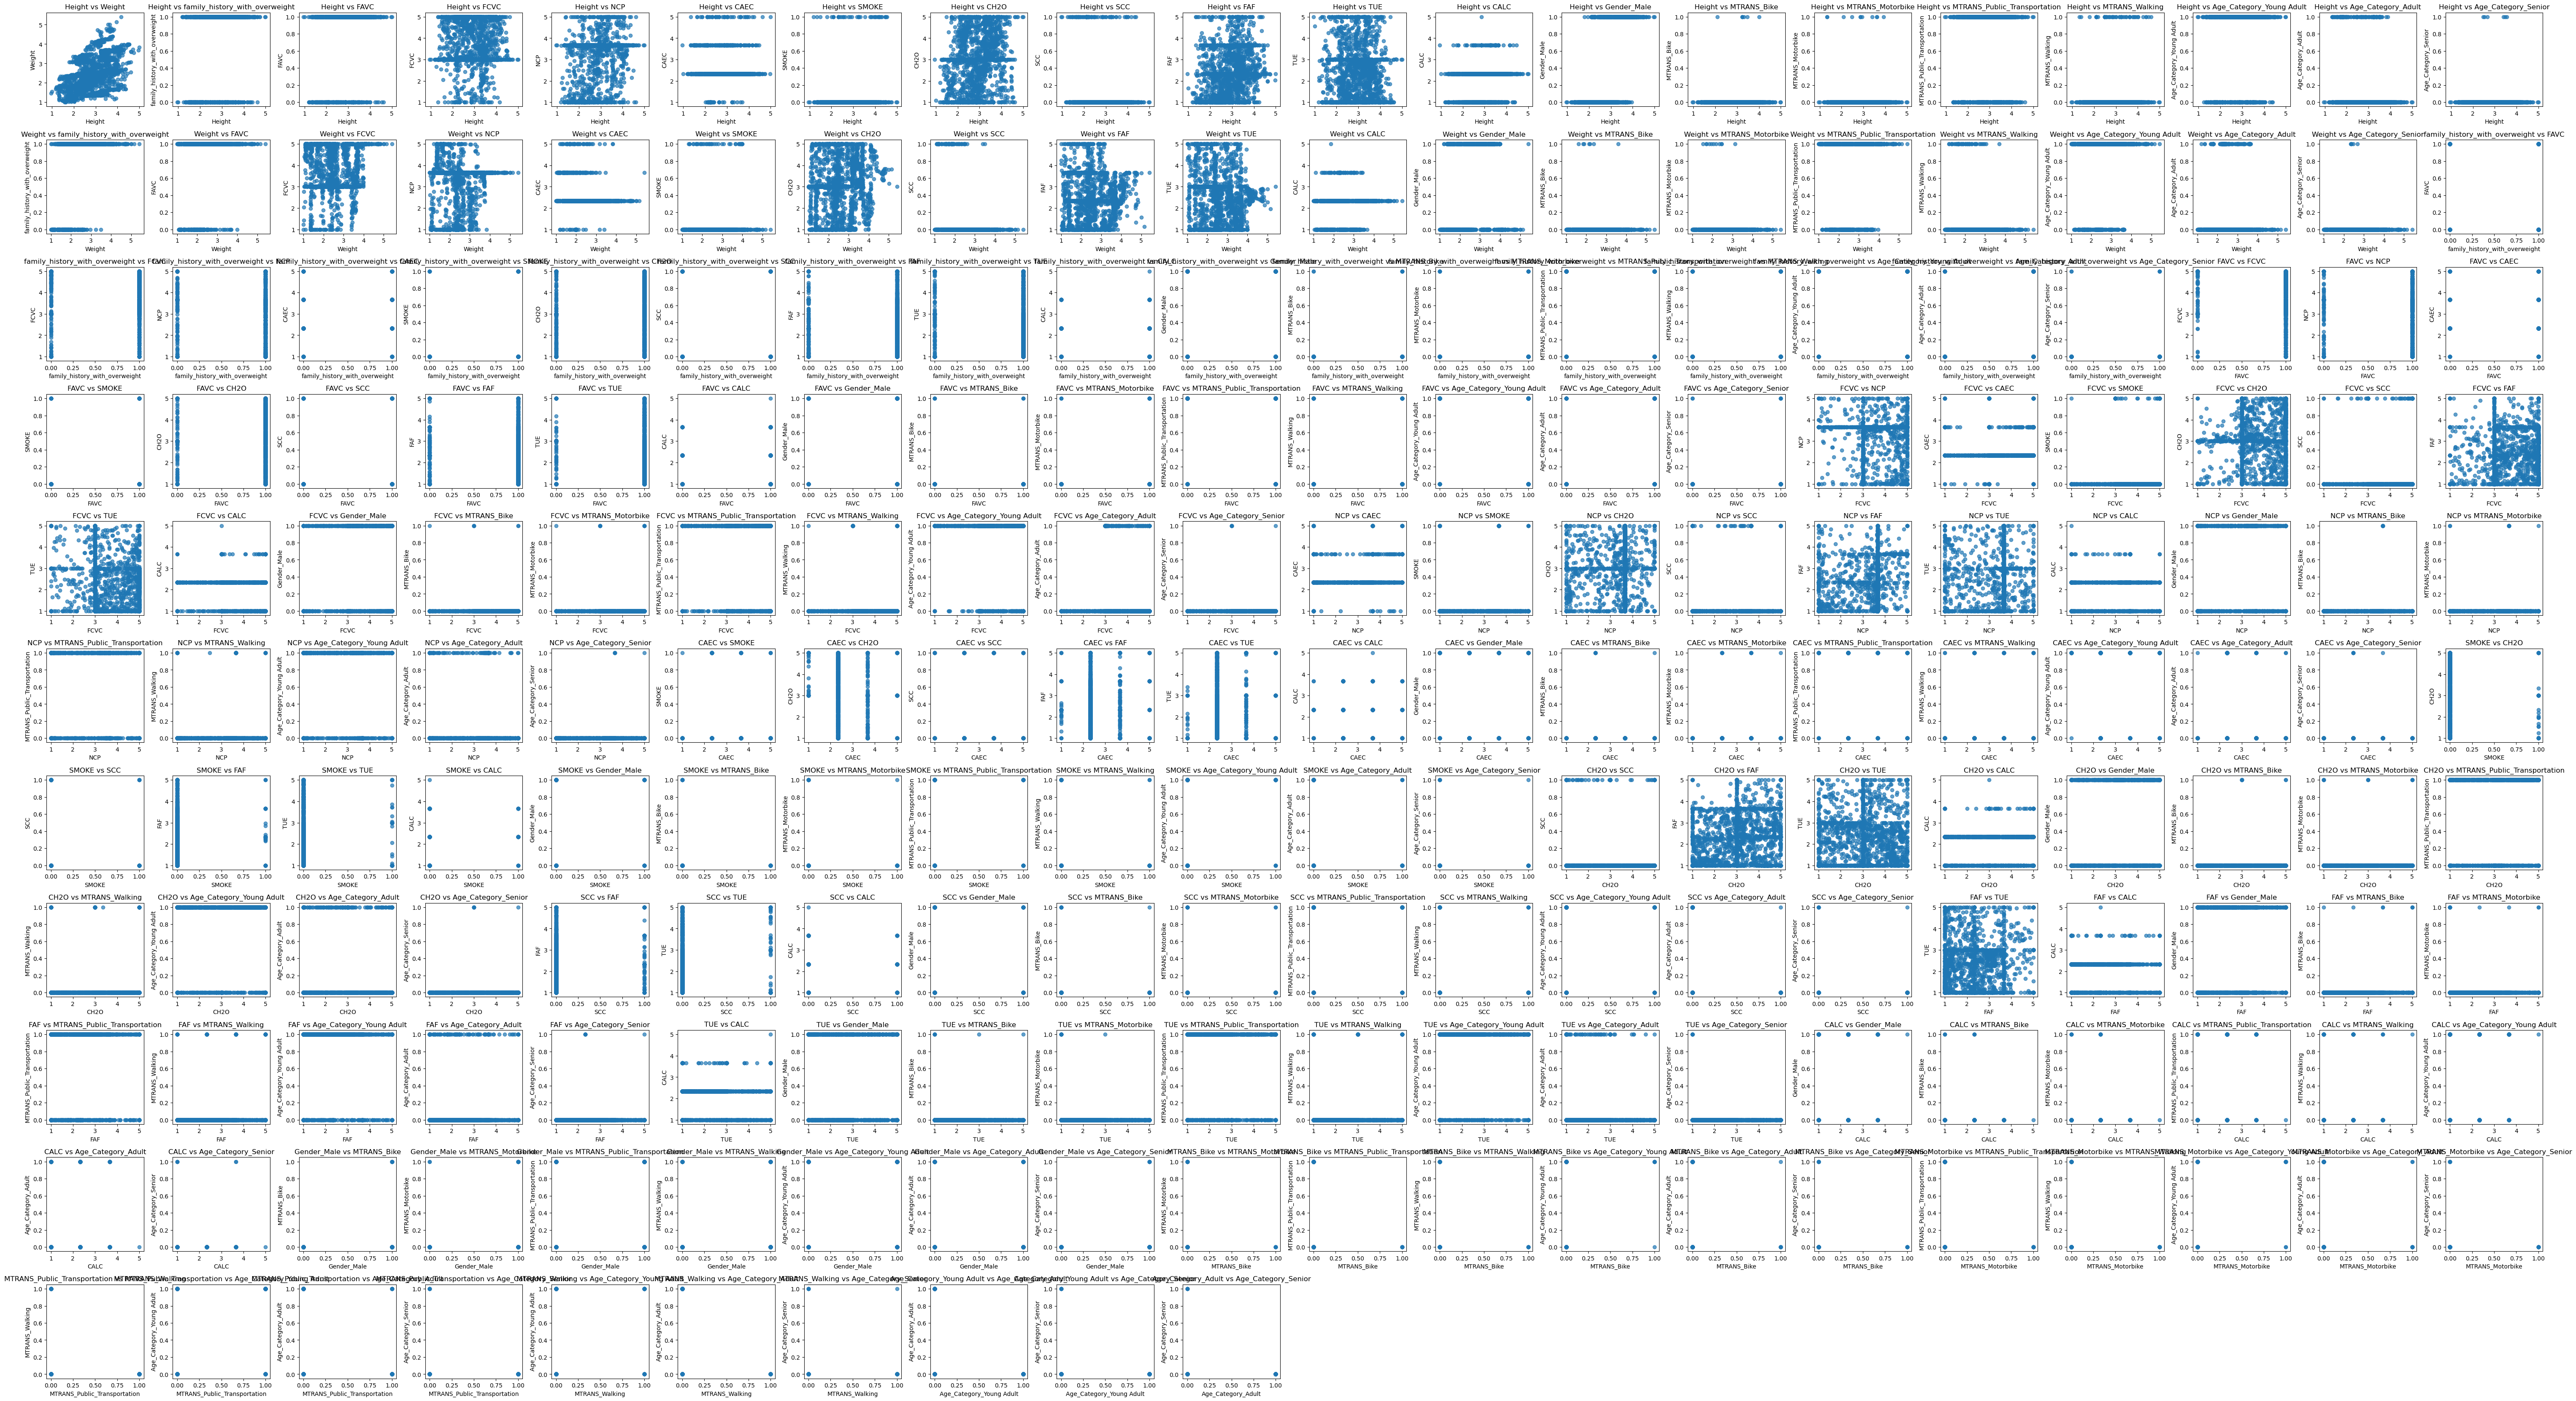

In [36]:
# Get feature names
feature_names = combined_df.columns

# Use the helper function to plot scatter plots
plot_feature_pairs(combined_df, feature_names, title_prefix='')

# Visualizing Binary vs Binary Columns

In [53]:
import seaborn as sns

def plot_binary_contingency_heatmap(df, binary_columns=None):
    """
    Create a contingency table heatmap for binary columns
    """
    
    # If no binary columns provided, find them automatically
    if binary_columns is None:
        binary_columns = []
        print("Checking for binary columns...")
        for col in df.columns:
            unique_vals = sorted(df[col].dropna().unique())
            # Check if column has exactly 2 unique values and they are 0 and 1
            if len(unique_vals) == 2 and set(unique_vals) == {0, 1}:
                binary_columns.append(col)
                print(f"✓ Found binary column: {col} with values {unique_vals}")
            else:
                print(f"✗ Skipping {col}: values = {unique_vals}")
    
    if len(binary_columns) < 2:
        print(f"Error: Need at least 2 binary columns. Found {len(binary_columns)}: {binary_columns}")
        return None
    
    print(f"\nAnalyzing {len(binary_columns)} binary columns: {binary_columns}")
    
    # Calculate subplot dimensions
    n_pairs = len(binary_columns) * (len(binary_columns) - 1) // 2
    n_cols = min(3, int(np.ceil(np.sqrt(n_pairs))))  # Max 3 columns
    n_rows = int(np.ceil(n_pairs / n_cols))
    
    # Create a figure for the heatmaps
    plt.figure(figsize=(5 * n_cols, 4 * n_rows))
    
    # Counter for subplot index
    plot_number = 1

    for i in range(len(binary_columns)):
        for j in range(i + 1, len(binary_columns)):
            col1 = binary_columns[i]
            col2 = binary_columns[j]

            # Create contingency table
            contingency = pd.crosstab(df[col1], df[col2], margins=True)

            plt.subplot(n_rows, n_cols, plot_number)
            
            # Plot heatmap (exclude margins)
            sns.heatmap(contingency.iloc[:-1, :-1], annot=True, fmt='d', 
                       cmap='Blues', cbar_kws={'label': 'Count'})
            
            # Add percentage annotations
            total = contingency.iloc[-1, -1]
            for row_idx in range(2):
                for col_idx in range(2):
                    count = contingency.iloc[row_idx, col_idx]
                    percentage = (count / total) * 100
                    plt.text(col_idx + 0.5, row_idx + 0.7, f'({percentage:.1f}%)', 
                            ha='center', va='center', fontsize=8, color='red')
            
            plt.xlabel(col2)
            plt.ylabel(col1)
            plt.title(f'{col1} vs {col2}')
            
            # Increment the plot number
            plot_number += 1
    
    plt.tight_layout()
    plt.show()
    
    return binary_columns

All columns in the dataset:
['Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'Gender_Male', 'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking', 'Age_Category_Young Adult', 'Age_Category_Adult', 'Age_Category_Senior']

Dataset shape: (2111, 21)

Data types:
Height                            float64
Weight                            float64
family_history_with_overweight      int64
FAVC                                int64
FCVC                              float64
NCP                               float64
CAEC                              float64
SMOKE                               int64
CH2O                              float64
SCC                                 int64
FAF                               float64
TUE                               float64
CALC                              float64
Gender_Male                          bool
MTRANS_Bike                          bo

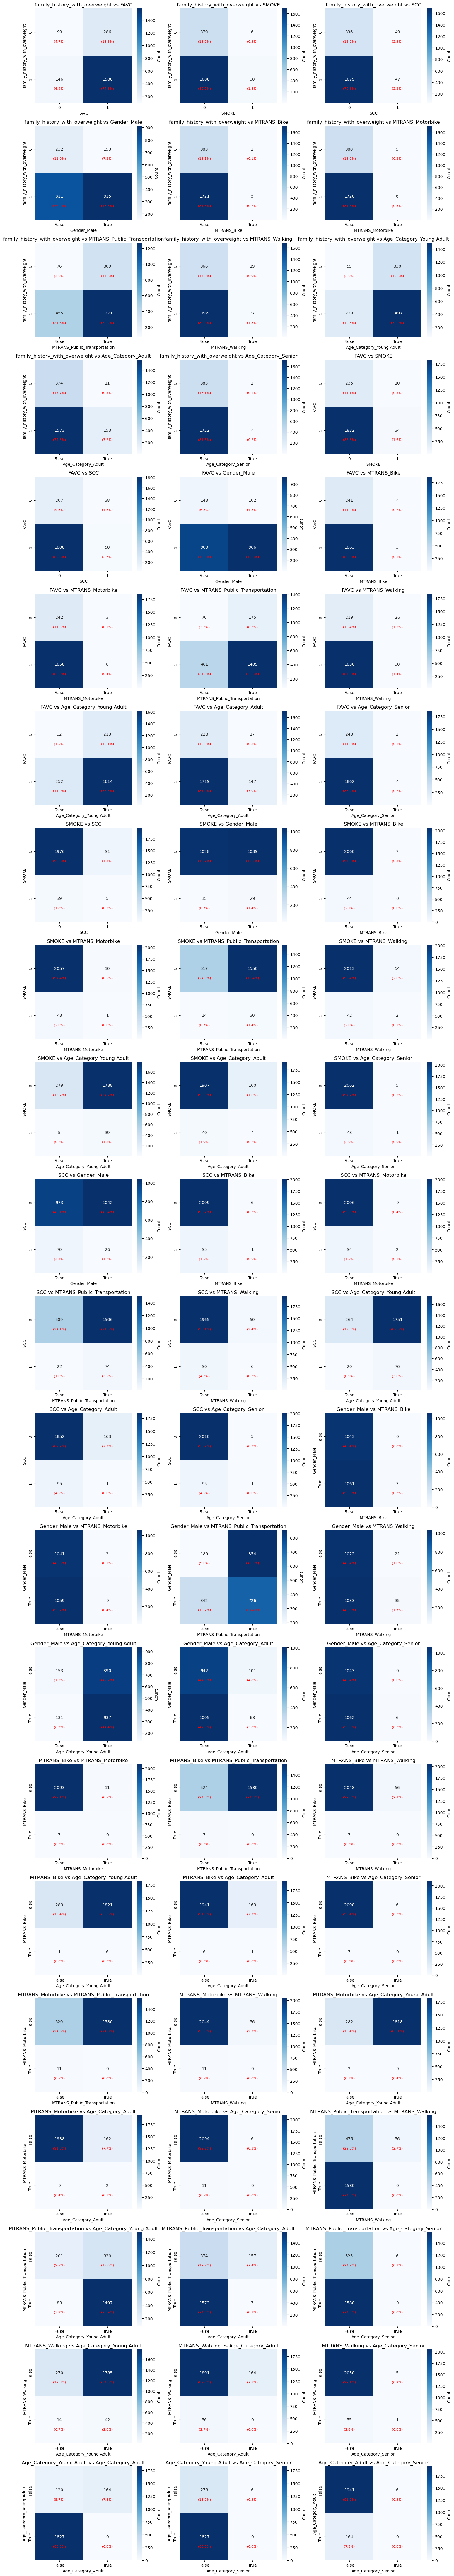

In [54]:
import numpy as np

# First, let's examine what columns we actually have
print("All columns in the dataset:")
print(combined_df.columns.tolist())
print(f"\nDataset shape: {combined_df.shape}")

# Check data types
print(f"\nData types:")
print(combined_df.dtypes)

# Check unique values for each column (first few)
print(f"\nUnique values per column (showing first 10 columns):")
for col in combined_df.columns[:10]:
    unique_vals = sorted(combined_df[col].dropna().unique())
    print(f"{col}: {unique_vals}")

# Now call the fixed function
binary_cols_found = plot_binary_contingency_heatmap(combined_df)

## Model development

First a few baseline models will be used:
- Decision Tree

In [75]:
data_path = '../../data/preprocessed/preprocessed_data_20250720_131842/'
X_train_file_pattern = 'X_train_scaled.csv'
X_train = pd.read_csv(data_path + X_train_file_pattern)
X_train

y_train_file_pattern = 'y_train_scaled.csv'
y_train = pd.read_csv(data_path + y_train_file_pattern)
y_train

X_test = pd.read_csv(data_path + 'X_test_scaled.csv')
y_test = pd.read_csv(data_path + 'y_test_scaled.csv')

In [88]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb

Best parameters: {'classifier__max_depth': 12, 'classifier__min_samples_split': 2}
Best MAE: 0.13984162379505907
Best CV Accuracy: 0.943
Test Accuracy: 0.901

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.83      0.90        54
           1       0.75      0.84      0.80        58
           2       0.94      0.90      0.92        70
           3       0.95      0.98      0.97        60
           4       1.00      0.98      0.99        65
           5       0.83      0.83      0.83        58
           6       0.87      0.91      0.89        58

    accuracy                           0.90       423
   macro avg       0.90      0.90      0.90       423
weighted avg       0.91      0.90      0.90       423



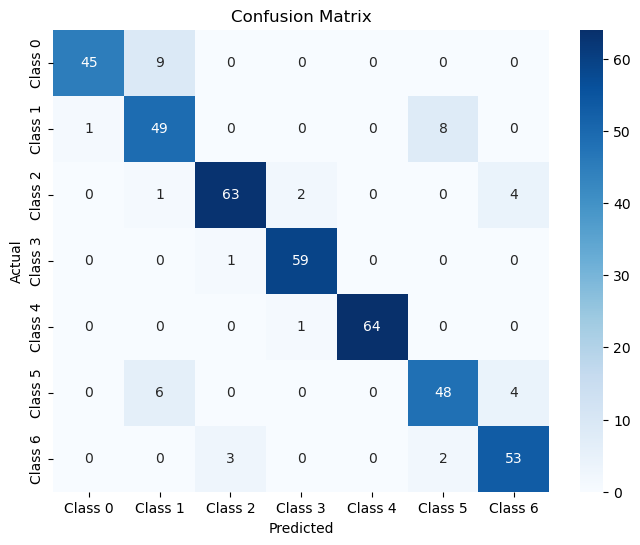

In [87]:
# Pipeline A = linear
pipeline_a = Pipeline([
    ('classifier', DecisionTreeClassifier(random_state=42))
])
pipeline_a

param_grid_a = {
    'classifier__max_depth': [5, 10, 12, 15, 17, 20, 25, 30, 35, 40],
    'classifier__min_samples_split': [0.5, 1.0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 40]
}

cv_strategy = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search_a = GridSearchCV(
    pipeline_a,
    param_grid_a,
    cv=cv_strategy,
    scoring=['neg_mean_absolute_error', 'accuracy'],
    refit='neg_mean_absolute_error',
    error_score='raise'
)

grid_search_a.fit(X_train, y_train)
print("Best parameters:", grid_search_a.best_params_)
print("Best MAE:", -grid_search_a.best_score_)

best_index = grid_search_a.best_index_
accuracy_scores = grid_search_a.cv_results_['mean_test_accuracy']
best_cv_accuracy = accuracy_scores[best_index]

print(f"Best CV Accuracy: {best_cv_accuracy:.3f}")

y_pred_a = grid_search_a.predict(X_test)

# Calculate accuracy
test_accuracy = accuracy_score(y_test.values.ravel(), y_pred_a)
print(f"Test Accuracy: {test_accuracy:.3f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test.values.ravel(), y_pred_a))

# Confusion Matrix
cm = confusion_matrix(y_test.values, y_pred_a)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[f'Class {i}' for i in range(len(cm))],
            yticklabels=[f'Class {i}' for i in range(len(cm))])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


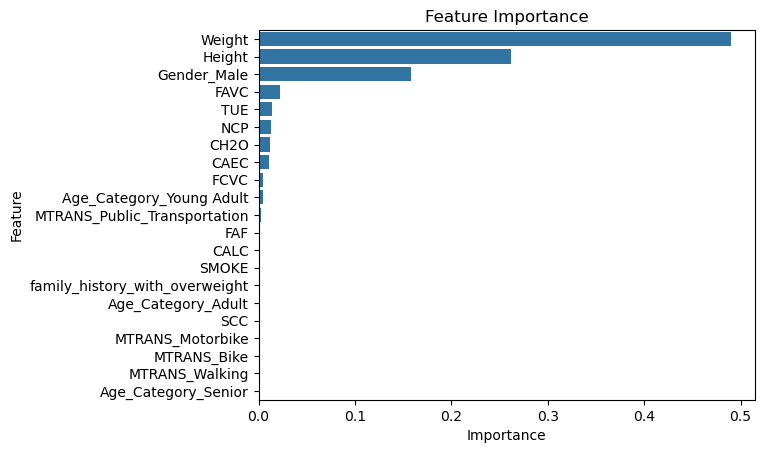

In [97]:
best_model_a = grid_search_a.best_estimator_

# Get feature importance
feature_importance = best_model_a.named_steps['classifier'].feature_importances_

# Get feature names
feature_names = X_train.columns.tolist()

# Create DataFrame 
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

Best parameters: {'classifier__learning_rate': 0.05, 'classifier__max_depth': 5, 'classifier__n_estimators': 325, 'classifier__subsample': 1.0}
Best MAE: 0.07107790634382737
Best CV Accuracy: 0.972
Test Accuracy: 0.901

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94        54
           1       0.87      0.95      0.91        58
           2       0.99      0.99      0.99        70
           3       0.98      1.00      0.99        60
           4       1.00      0.98      0.99        65
           5       0.98      0.93      0.96        58
           6       0.98      0.98      0.98        58

    accuracy                           0.97       423
   macro avg       0.97      0.97      0.97       423
weighted avg       0.97      0.97      0.97       423



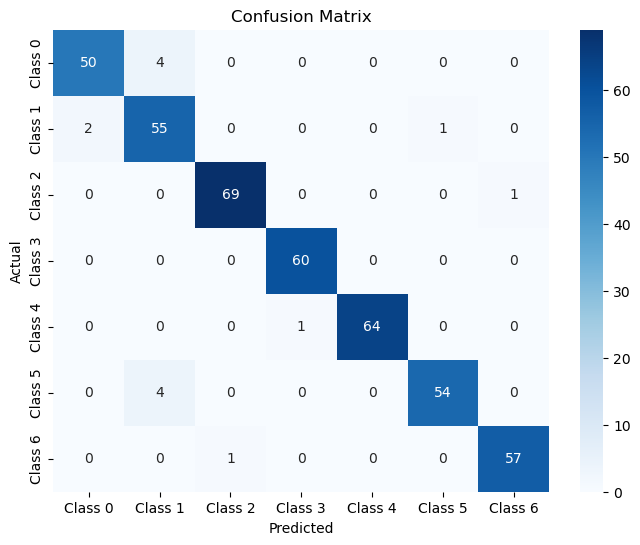

In [ ]:
pipeline_xgb = Pipeline([
    ('classifier', xgb.XGBClassifier(random_state=42, eval_metric='logloss'))
])

param_grid_xgb = {
    'classifier__n_estimators': [200, 225, 250, 275, 300, 325, 350],
    'classifier__max_depth': [3, 5, 7, 9, 11],
    'classifier__learning_rate': [1, 0.5, 0.1, 0.05, 0.01, 0.005],
    'classifier__subsample': [0.8, 0.9, 1.0],
}

cv_strategy = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search_xgb = GridSearchCV(
    pipeline_xgb,
    param_grid_xgb,
    cv=cv_strategy,
    scoring=['neg_mean_absolute_error', 'accuracy'],
    refit='neg_mean_absolute_error',
    error_score='raise'
)

grid_search_xgb.fit(X_train, y_train)
print("Best parameters:", grid_search_xgb.best_params_)
print("Best MAE:", -grid_search_xgb.best_score_)

best_index = grid_search_xgb.best_index_
accuracy_scores = grid_search_xgb.cv_results_['mean_test_accuracy']
best_cv_accuracy = accuracy_scores[best_index]

print(f"Best CV Accuracy: {best_cv_accuracy:.3f}")

y_pred_xgb = grid_search_xgb.predict(X_test)

# Calculate accuracy
test_accuracy = accuracy_score(y_test.values.ravel(), y_pred_a)
print(f"Test Accuracy: {test_accuracy:.3f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test.values.ravel(), y_pred_xgb))

# Confusion Matrix
cm = confusion_matrix(y_test.values, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[f'Class {i}' for i in range(len(cm))],
            yticklabels=[f'Class {i}' for i in range(len(cm))])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Best parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 200, 'classifier__subsample': 1.0}
# Best MAE: 0.07523572068196584
# Best CV Accuracy: 0.970

# Best parameters: {'classifier__learning_rate': 0.05, 'classifier__max_depth': 5, 'classifier__n_estimators': 300, 'classifier__subsample': 1.0}
# Best MAE: 0.07167137815391639
# Best CV Accuracy: 0.971
# Test Accuracy: 0.901

# Best parameters: {'classifier__learning_rate': 0.05, 'classifier__max_depth': 5, 'classifier__n_estimators': 325, 'classifier__subsample': 1.0}
# Best MAE: 0.07107790634382737
# Best CV Accuracy: 0.972
# Test Accuracy: 0.901

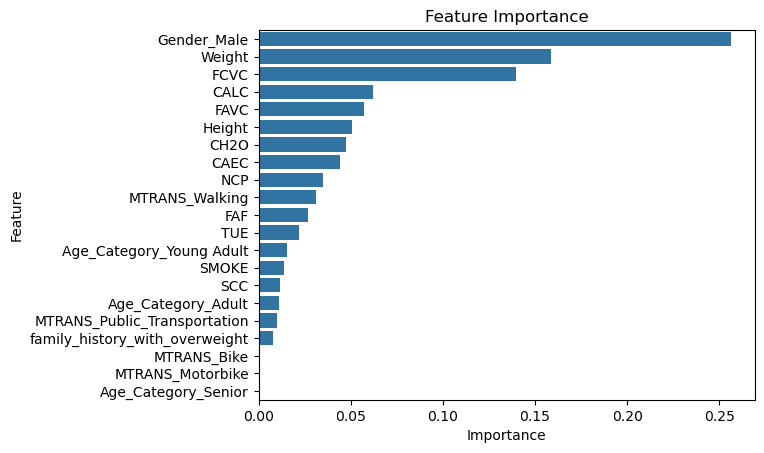

In [96]:
best_model_xgb = grid_search_xgb.best_estimator_

# Get feature importance
feature_importance = best_model_xgb.named_steps['classifier'].feature_importances_

# Get feature names
feature_names = X_train.columns.tolist()

# Create DataFrame 
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()